<font color=#1E8449>☘ </font> 注意事項
1. 如果您使用 Colab，在您熟悉 Colab 的操作環境之後，建議把介面改成英文版，以便讓程式碼有最好的顯示效果
 * 選擇 Colab 功能表裡的 <font color=#E59866>說明</font> - <font color=#E59866>查看英文版本</font> 即可將介面改成英文版
 * 要改回中文版，請關掉目前開啟的 Colab 網頁，再重新開啟您執行的 Colab 檔案即可（Colab 預設為中文版）
2. 建議選擇暗色背景，長時間撰寫程式時眼睛會比較舒服
 * 在 Colab 裡選擇 <font color=#E59866>Tools（工具）</font> - <font color=#E59866> Settings （設定）</font> - <font color=#E59866> Site（網站）</font> - <font color=#E59866> Theme （主題）</font> - <font color=#E59866> Dark </font>
 * 在 Jupyter lab 中選擇 <font color=#E59866> Settings </font> - <font color=#E59866> JupyterLab theme </font> - <font color=#E59866> JupyerterLab Dark </font>



## Chap 12 使用 Pandas 處理數據資料

## 12.1 Pandas 的基本認識

<font color=#1EA004>☘ </font> Pandas 名稱起源於 Panel data sets

<font color=#1EA004>☘ </font> Pandas 擅長處理表格數據，就像是 Excel 專精於處理資料表一樣

### 12.1.1 一維的 Series 資料型別

<font color=#1EA004>☘ </font> Series 可用來儲存一維的數據資料，有點類似於 Numpy 的單軸陣列

<font color=#DB9B1A>- 與 Series 物件相關的函數 - </font>

* pd.Series()：建立 Series 物件，可以利用串列或字典來建立
* s.ndim; s.shape; s.size：查詢 Series 物件 s 的維度、形狀和元素個數
* s.dtype 或 s.dtypes：查詢 Series 物件 s 元素的型別
* s.values：提取 Series 物件 s 的值
* s.index：提取 Series 物件 s 的索引名稱
* where(list)：若 list 裡的元素為True，則提取該元素，否則回應 NaN
* isna()：判別 Series 物件裡的元素是否為缺失值
* notna()：判別 Series 物件裡的元素是否不是缺失值
* fillna(n)：將 Series 物件裡的缺失值填上 n
* dropna()：刪除 Series 物件裡的缺失值


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
s0=pd.Series([4.3,7.24,8.5])

In [ ]:
s0

0    4.30
1    7.24
2    8.50
dtype: float64

<font color=#1EA004>☘ </font>  Series 只有一個索引，下節將提到二維的 DataFrame 物件則有「列」和「欄」兩個索引

In [ ]:
s0.ndim   # 維度

1

In [ ]:
s0.shape  # 形狀

(3,)

In [ ]:
s0.size   # 大小

3

In [ ]:
s0.dtype  # Series的型別

dtype('float64')

In [ ]:
pd.Series([4,'a',12]).dtype   # Series裡的資料有不同的型別，O代表 Object

dtype('O')

In [ ]:
s0.values   # 取出s0的值

array([4.3 , 7.24, 8.5 ])

In [ ]:
s0.index    # 取出s0的索引

RangeIndex(start=0, stop=3, step=1)

<font color=#1EA004>☘ </font> 一個 Series 物件包含 index 與 value 兩個屬性

<font color=#1EA004>☘ </font> 如果沒有賦予 index 屬性，預設是從0開始的流水編號作為索引

In [ ]:
s0[0],s0[1]  # use index to extract elements

(4.3, 7.24)

In [ ]:
s0[1:]

1    7.24
2    8.50
dtype: float64

In [ ]:
s0[[0,2]]   # extract the zero-th and second elements

0    4.3
2    8.5
dtype: float64

In [ ]:
s0[4]=7; s0    # 新增資料

0    4.30
1    7.24
2    8.50
4    7.00
dtype: float64

In [ ]:
s0['candy']=12; s0   #可視為索引的設定

0         4.30
1         7.24
2         8.50
4         7.00
candy    12.00
dtype: float64

In [ ]:
s0.index

Index([0, 1, 2, 4, 'candy'], dtype='object')

<font color=#1EA004>☘ </font> 在建立 Series 物件時就賦予特定的索引

In [ ]:
s1=pd.Series([4,7,8],index=['a','b','c']) # assign index for elements

In [ ]:
s1

a    4
b    7
c    8
dtype: int64

In [ ]:
s1['a']    # extract element using index

4

In [ ]:
s1['b']=-5; s1   #修改

a    4
b   -5
c    8
dtype: int64

In [ ]:
s1[0]

4

<font color=#1EA004>☘ </font> in 運算子可查詢某個 Series 物件是否包含某個索引

<font color=#1EA004>☘ </font> where() 可針對 Series 物件裡滿足某些條件的元素進行處理

In [ ]:
s1.index    # 提取s1的index

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
'a' in s1   # 'a' 是 s1 的index

True

In [ ]:
0 in s1     # 0 不是 s1 的index

False

In [ ]:
8 in s1

False

In [ ]:
s1.where(s1>0)

a    4.0
b    NaN
c    8.0
dtype: float64

In [ ]:
s1

a    4
b   -5
c    8
dtype: int64

In [ ]:
s2=s1.where(s1>0)
s2

a    4.0
b    NaN
c    8.0
dtype: float64

In [ ]:
s1.where(s1>0,0)

a    4
b    0
c    8
dtype: int64

<font color=#1EA004>☘ </font> 利用字典來建立 Series 物件

<font color=#1EA004>☘ </font> 字典的鍵（Key）會做為 Series 的索引，字典的值（Value）會做為 Series 的值

In [ ]:
d0={'coffee':50,'tea':30,'juice':60}

In [ ]:
s2=pd.Series(d0)

In [ ]:
s2

coffee    50
tea       30
juice     60
dtype: int64

In [ ]:
s3=pd.Series(d0,index=['tea','cola','coffee'])  # assign index, 索引沒有對應值就會是NaN
s3

tea       30.0
cola       NaN
coffee    50.0
dtype: float64

In [ ]:
s3.isna()   # detect missing elements

tea       False
cola       True
coffee    False
dtype: bool

In [ ]:
s3.notna()  # detect existing elements

tea        True
cola      False
coffee     True
dtype: bool

<font color=#1EA004>☘ </font> 我們也可以直接對 Series 物件的 index 屬性重新設值

In [ ]:
s3.index=['tea','juice','candy']

In [ ]:
s3

tea      30.0
juice     NaN
candy    50.0
dtype: float64

In [ ]:
s3.fillna(0)   # fill NaN

tea      30.0
juice     0.0
candy    50.0
dtype: float64

In [ ]:
s3.dropna()    # drop Nan

tea      30.0
candy    50.0
dtype: float64

### 12.1.2 二維的 DataFrame

<font color=#1EA004>☘ </font> DataFrame 是用來記錄二維的資料表

<font color=#1EA004>☘ </font> DataFrame 需要有列（row）和欄
（column）兩個索引才能提取資料

<font color=#DB9B1A>- 與 DataFrame 物件相關的函數 - </font>

* pd.DataFrame()：建立 DataFrame 物件，可以利用串列或字典來建立
* d.dtypes：查詢 DataFrame 物件的型別（注意dtypes要加s）
* d.index：提取或設定 DataFrame 物件的列索引
* d.columns：提取或設定 DataFrame 物件的欄索引（或稱行索引）
* head(n)：提取 DataFrame 物件的前 n 筆資料
* tail(n)：提取 DataFrame 物件的後 n 筆資料
* d.T：將DataFrame 物件轉置，也就是欄與列互換


In [ ]:
ar=np.arange(6).reshape((2,3))

In [ ]:
br=np.arange(6)
br

array([0, 1, 2, 3, 4, 5])

In [ ]:
br=br.reshape(2,3)
br

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
pd.DataFrame(ar)  #注意row, column的索引

,0,1,2
0,0,1,2
1,3,4,5


In [ ]:
pd.DataFrame(ar,columns=['a','b','c'])   # 指定 column index

,a,b,c
0,0,1,2
1,3,4,5


In [ ]:
pd.DataFrame(ar,index=['Java','C++'])    # 指定 row index

,0,1,2
Java,0,1,2
C++,3,4,5


In [ ]:
data={'Math':   [98,99,38,97],
      'Biology':[78,89,45,67],
      'English':[87,98,86,98]}

In [ ]:
d0=pd.DataFrame(data); d0  # create DataFrame using a dictionary

,Math,Biology,English
0,98,78,87
1,99,89,98
2,38,45,86
3,97,67,98


In [ ]:
d0.head(3)    # default display 5 records

,Math,Biology,English
0,98,78,87
1,99,89,98
2,38,45,86


In [ ]:
d0.tail(2)    # display last two records

,Math,Biology,English
2,38,45,86
3,97,67,98


In [ ]:
d0.dtypes

Math       int64
Biology    int64
English    int64
dtype: object

In [ ]:
d0.shape

(4, 3)

In [ ]:
pd.DataFrame(data,columns=['English','Math','Biology'])  # re-arrange columns

,English,Math,Biology
0,87,98,78
1,98,99,89
2,86,38,45
3,98,97,67


In [ ]:
# Missing values
d1=pd.DataFrame(data,
                columns=['English','Math','Python'],
                index=['Tom','Jerry','Mary','Bob'])

In [ ]:
d1   # values in Python col is missing

,English,Math,Python
Tom,87,98,NaN
Jerry,98,99,NaN
Mary,86,38,NaN
Bob,98,97,NaN


In [ ]:
d1.columns    # returns an Index object

Index(['English', 'Math', 'Python'], dtype='object')

In [ ]:
d1.index      # returns an Index object

Index(['Tom', 'Jerry', 'Mary', 'Bob'], dtype='object')

<font color=#1EA004>☘ </font> DataFrame 物件的元素可以利用欄索引與列的索引提取

In [ ]:
d1.columns[2]

'Python'

In [ ]:
d1.index[0]

'Tom'

In [ ]:
d1['Math']   # returns a Series object

Tom      98
Jerry    99
Mary     38
Bob      97
Name: Math, dtype: int64

In [ ]:
d1.English   # also returns a Series object

Tom      87
Jerry    98
Mary     86
Bob      98
Name: English, dtype: int64

In [ ]:
d1['Python']=[78,99,43,78]; d1

,English,Math,Python
Tom,87,98,78
Jerry,98,99,99
Mary,86,38,43
Bob,98,97,78


In [ ]:
s=pd.Series([77,44],index=['Bob','Mary'])

In [ ]:
d1['Math']=s; d1   # assign a series to column 'Math'

,English,Math,Python
Tom,87,NaN,78
Jerry,98,NaN,99
Mary,86,44.0,43
Bob,98,77.0,78


In [ ]:
d1['Missing']=d1.Math.isna(); d1   # Create a 'Missing' column

,English,Math,Python,Missing
Tom,87,NaN,78,True
Jerry,98,NaN,99,True
Mary,86,44.0,43,False
Bob,98,77.0,78,False


In [ ]:
del d1['Missing']; d1   # delete the 'Missing' column

,English,Math,Python
Tom,87,NaN,78
Jerry,98,NaN,99
Mary,86,44.0,43
Bob,98,77.0,78


<font color=#1EA004>☘ </font> 在 Numpy 中，包含有 np.nan 的陣列都會被視為浮點數，即使其它元素都是整數

<font color=#1EA004>☘ </font> 由於 Pandas 是以 Numpy 為基底來運作，因此當某欄有 NaN 時，同一欄的數字也會被看成是浮點數

In [ ]:
a=np.array([np.nan,12,40]); a

array([nan, 12., 40.])

In [ ]:
a.dtype

dtype('float64')

In [ ]:
d1.values   # extract values from dataframe

array([[87., nan, 78.],
       [98., nan, 99.],
       [86., 44., 43.],
       [98., 77., 78.]])

In [ ]:
d1.T   # Transpose

,Tom,Jerry,Mary,Bob
English,87.0,98.0,86.0,98.0
Math,NaN,NaN,44.0,77.0
Python,78.0,99.0,43.0,78.0


<font color=#1EA004>☘ </font> where()、isna()、notna()、fillna() 和 dropna() 等函數也可以作用在 DataFrame 物件

In [ ]:
d=pd.DataFrame(
    [[63,65,77],[63,None,39]],
    columns=['Java','C++','VB']); d

,Java,C++,VB
0,63,65.0,77
1,63,NaN,39


In [ ]:
d['C++']

0    65.0
1     NaN
Name: C++, dtype: float64

In [ ]:
d['C++'][1]

nan

In [ ]:
d.isna()   # True 的位置為 NaN

,Java,C++,VB
0,False,False,False
1,False,True,False


In [ ]:
d.fillna(0)

,Java,C++,VB
0,63,65.0,77
1,63,0.0,39


In [ ]:
d.where(d<60)    # 只顯示滿足條件的值

,Java,C++,VB
0,NaN,NaN,NaN
1,NaN,NaN,39.0


## 12.2 Series 和 DataFrame 的運算

<font color=#1EA004>☘ </font> 常用的 Series 和 DataFrame 物件相關運算有索引的重排、元素的插入與刪除，篩選、提取和其它運算等。

<font color=#DB9B1A>- 與 Series 和DataFrame 物件相關的運算函數 - </font>

* reindex()：將列索引依重新排列
* drop(n)：刪除索引為 n 的元素
* insert(i,v,data)：在欄索引 i 以索引 v 添加資料 data（僅適用於 DataFrame）
* d1.append(d2)：將資料 d2 附加在 d1 的最後面
* d.loc[row, col]：依列索引 row 和欄索引 col 來提取元素
* d.iloc[irow, icol]：依列和欄之索引來提取元素（irow 和 icol 為整數）
* d1.add(d2)：同 d1 + d2
* d1.sub(d2)：同 d1 - d2
* d1.mul(d2)：同 d1 × d2
* d1.div(d2)：同 d1 / d2
* d.index.duplicated()：判別物件 d 的列索引是否重複


### 12.2.1 元素的選取

In [ ]:
s0=pd.Series([6,7,8],
            index=['a','b','c']); s0

a    6
b    7
c    8
dtype: int64

In [ ]:
s0[2], s0[-1], s0['c']

(8, 8, 8)

In [ ]:
s0[1:]

b    7
c    8
dtype: int64

In [ ]:
s0[[2,0,1]]

c    8
a    6
b    7
dtype: int64

<font color=#1EA004>☘ </font> loc 是以索引名稱來提取元素，使用起來比較直覺

<font color=#1EA004>☘ </font> iloc（integer location）則是以元素的所在位置來提取，使用起來比較靈活

In [ ]:
s0.iloc[0],s0.iloc[-1]

(6, 8)

In [ ]:
s0.iloc[::-1] #start, stop, step

c    8
b    7
a    6
dtype: int64

In [ ]:
s0.loc['c']

8

In [ ]:
s1=pd.Series([6,7,8])

In [ ]:
s1[0]

6

In [ ]:
s1[1:]

1    7
2    8
dtype: int64

In [ ]:
# s1[-1]  # Pandas會不知道 -1是索引，還是用來表示最後一個位置

<font color=#1EA004>☘ </font> 利用方括號 [] 可以提取 DataFrame 裡某些欄位的元素

<font color=#1EA004>☘ </font> 也可以利用花式索引提取數個欄位，並可將這些欄位的順序重排

In [ ]:
d=pd.DataFrame(np.arange(12).reshape(3,4),
               index=['a','b','c'],
               columns=['w','x','y','z'])

In [ ]:
d

,w,x,y,z
a,0,1,2,3
b,4,5,6,7
c,8,9,10,11


In [ ]:
d['w']

a    0
b    4
c    8
Name: w, dtype: int64

In [ ]:
d[['w','y','x']]

,w,y,x
a,0,2,1
b,4,6,5
c,8,10,9


In [ ]:
d[1:]

,w,x,y,z
b,4,5,6,7
c,8,9,10,11


In [ ]:
d[0:2]

,w,x,y,z
a,0,1,2,3
b,4,5,6,7


In [ ]:
d[0:2]['x']

a    1
b    5
Name: x, dtype: int64

In [ ]:
d[0:2][['x','w','z']]

,x,w,z
a,1,0,3
b,5,4,7


<font color=#1EA004>☘ </font> 利用 loc 和 iloc 來提取 DataFrame 物件的某些列或欄，或是列或欄裡的某些元素

In [ ]:
d.loc['a','x']    # extract element with row index 'a' and col index 'x'

1

In [ ]:
d.iloc[0,2]       # extract element in the zero-th row and second col

2

In [ ]:
d.loc['a',['w','x']]  # extract element with row index 'a', and col indices 'w' and 'x'

w    0
x    1
Name: a, dtype: int64

In [ ]:
d.loc[['a','c'],['w','x']]

,w,x
a,0,1
c,8,9


In [ ]:
d.loc[:,['w','x']]

,w,x
a,0,1
b,4,5
c,8,9


In [ ]:
d.loc[['a','b']]

,w,x,y,z
a,0,1,2,3
b,4,5,6,7


In [ ]:
d.iloc[:2,1:]  # similar to numpy indexing

,x,y,z
a,1,2,3
b,5,6,7


In [ ]:
d.iloc[[1,2],[2,3,1]]  # fancy indexing

,y,z,x
b,6,7,5
c,10,11,9


In [ ]:
d.iloc[-1,2:]    # 提取最後一列，索引從 2 開始之後所有的行

y    10
z    11
Name: c, dtype: int64

### 12.2.2 提取符合特定條件的元素

<font color=#1EA004>☘ </font> For Series objects

In [ ]:
s=pd.Series([23,55,32])

In [ ]:
s<40

0     True
1    False
2     True
dtype: bool

In [ ]:
s[s<40]     # 利用布林運算提取元素

0    23
2    32
dtype: int64

* For DataFrame objects

In [ ]:
score=[[37,65,54],
       [38,87,77],
       [65,77,90]]
name=['Tom','Jerry','Mary'];
course=['Math','English','Biology']

In [ ]:
d=pd.DataFrame(score,
               index=name,
               columns=course)

In [ ]:
d

,Math,English,Biology
Tom,37,65,54
Jerry,38,87,77
Mary,65,77,90


In [ ]:
d['Math']>=60

Tom      False
Jerry    False
Mary      True
Name: Math, dtype: bool

In [ ]:
d[d['Math']>=60]   # extract the rows with the True value

,Math,English,Biology
Mary,65,77,90


In [ ]:
d>=60  # similar to numpy operation

,Math,English,Biology
Tom,False,True,False
Jerry,False,True,True
Mary,True,True,True


In [ ]:
d.loc['Jerry']  # extract elements using row index

Math       38
English    87
Biology    77
Name: Jerry, dtype: int64

In [ ]:
d.loc['Jerry']>=60

Math       False
English     True
Biology     True
Name: Jerry, dtype: bool

In [ ]:
d.columns

Index(['Math', 'English', 'Biology'], dtype='object')

In [ ]:
list(d.columns)

['Math', 'English', 'Biology']

In [ ]:
d.columns[0]   # 提取索引為 0 的行索引

'Math'

In [ ]:
d.columns[[True,True,False]]

Index(['Math', 'English'], dtype='object')

<font color=#1EA004>☘ </font> 提取滿足某些條件下的索引名稱

In [ ]:
d.columns[d.loc['Jerry']>=60]   # Jerry及格的科目名稱

Index(['English', 'Biology'], dtype='object')

In [ ]:
d.index[d['Math']<60]           # Math不及格的學生

Index(['Tom', 'Jerry'], dtype='object')

In [ ]:
(d>=60).all(axis=0)             # 所有學生都及格的科目, axis=0 針對column方向, 這跟後面drop不同

Math       False
English     True
Biology    False
dtype: bool

In [ ]:
(d>=60).all(axis=1)             # 所有科目都及格的學生, axis=1 針對row方向, 這跟後面drop不同

Tom      False
Jerry    False
Mary      True
dtype: bool

In [ ]:
(d.Math<60) | (d.Biology<60)

Tom       True
Jerry     True
Mary     False
dtype: bool

In [ ]:
d[d<60]=60;d                    # 把小於60的分數都設為60

,Math,English,Biology
Tom,60,65,60
Jerry,60,87,77
Mary,65,77,90


### 12.2.3 索引值的重排

In [ ]:
s=pd.Series([8,12],index=['c','a'])

In [ ]:
s

c     8
a    12
dtype: int64

In [ ]:
s.reindex(['a','b','c'])

a    12.0
b     NaN
c     8.0
dtype: float64

In [ ]:
d=pd.DataFrame([[1,2,3],
                [4,5,6]],
              index=['a','b'],
              columns=['x','y','z'])

In [ ]:
d

,x,y,z
a,1,2,3
b,4,5,6


In [ ]:
# reindex rows
d.reindex(list('abc'))    # f remains unchanged

,x,y,z
a,1.0,2.0,3.0
b,4.0,5.0,6.0
c,NaN,NaN,NaN


In [ ]:
# reindex columns
d.reindex(columns=['x','y','w'])   # f remains unchanged

,x,y,w
a,1,2,NaN
b,4,5,NaN


In [ ]:
d.reindex(list('abc'),
          columns=['w','x','y'])  # reindex rows and columns simulataneously

,w,x,y
a,NaN,1.0,2.0
b,NaN,4.0,5.0
c,NaN,NaN,NaN


### 12.2.4 刪除與插入列或欄

In [ ]:
s=pd.Series([12,4,6,11])

In [ ]:
s.drop(2)   # drop the second element, 請注意, 並沒有儲存

0    12
1     4
3    11
dtype: int64

In [ ]:
s.drop([1,3])

0    12
2     6
dtype: int64

In [ ]:
s.append(pd.Series([90,100]))  # append another series, 索引重複

<ipython-input-142-669228de509a>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s.append(pd.Series([90,100]))  # append another series


0     12
1      4
2      6
3     11
0     90
1    100
dtype: int64

In [ ]:
s.append(pd.Series([90,100]),ignore_index=True)

<ipython-input-143-e2c2cd29346d>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s.append(pd.Series([90,100]),ignore_index=True)


0     12
1      4
2      6
3     11
4     90
5    100
dtype: int64

In [ ]:
d=pd.DataFrame([[1,2,3,4],[4,5,6,7]])

In [ ]:
d

,0,1,2,3
0,1,2,3,4
1,4,5,6,7


In [ ]:
d.drop([0])   # drop a row with index 0, 請注意沒有儲存

,0,1,2,3
1,4,5,6,7


In [ ]:
d

,0,1,2,3
0,1,2,3,4
1,4,5,6,7


In [ ]:
d.drop([0,1],axis=1)  # or axis='columns'

,2,3
0,3,4
1,6,7


In [ ]:
d  # d remains the same

,0,1,2,3
0,1,2,3,4
1,4,5,6,7


In [ ]:
d.append(pd.DataFrame([[9,9,9,9]]))  # appand another DataFrame, 請注意沒有儲存

<ipython-input-158-6224e05edb0d>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d.append(pd.DataFrame([[9,9,9,9]]))  # appand another DataFrame


,0,1,2,3
0,1,2,3,4
1,4,5,6,7
0,9,9,9,9


In [ ]:
d

,0,1,2,3
0,1,2,3,4
1,4,5,6,7


In [ ]:
d.append(pd.DataFrame([[9,9,9,9]]),ignore_index=True)

<ipython-input-160-cf3ea3aaea59>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  d.append(pd.DataFrame([[9,9,9,9]]),ignore_index=True)


,0,1,2,3
0,1,2,3,4
1,4,5,6,7
2,9,9,9,9


In [ ]:
d.drop([0,1],axis=1,inplace=True)  # f is changed inplace

In [ ]:
d

,2,3
0,3,4
1,6,7


<font color=#1EA004>☘ </font> 如果要插入一欄資料到 DataFrame，可以利用 insert()

In [ ]:
d=pd.DataFrame([[1,2],
                [3,4]],
              index=['a','b'],
              columns=['x','y'])

In [ ]:
d.insert(1,'v',[9,8])  # in-place insert (insert elements to first column)

In [ ]:
d

,x,v,y
a,1,9,2
b,3,8,4


### 12.2.5 四則運算與其它函數的運算

In [ ]:
s1=pd.Series([2,9,1],
             index=['a','c','d'])

In [ ]:
s2=pd.Series([3,2],index=['a','d'])

In [ ]:
s1+s2

a    5.0
c    NaN
d    3.0
dtype: float64

In [ ]:
s1.add(s2)

a    5.0
c    NaN
d    3.0
dtype: float64

In [ ]:
s1.add(s2,fill_value=0)  # specify fill value, s2的'c'值為0

a    5.0
c    9.0
d    3.0
dtype: float64

In [ ]:
s1.mul(s2)               # mul 是 multiply 的意思

a    6.0
c    NaN
d    2.0
dtype: float64

In [ ]:
s3=s1.append(s2); s3   # replicated labels (a and d)

<ipython-input-173-8c860385b212>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s3=s1.append(s2); s3   # replicated labels (a and d)


a    2
c    9
d    1
a    3
d    2
dtype: int64

In [ ]:
s3['a']

a    2
a    3
dtype: int64

In [ ]:
s3.index.duplicated()

array([False, False, False,  True,  True])

In [ ]:
s3[~s3.index.duplicated()]    # 取出第一次出現之列索引與其內容

a    2
c    9
d    1
dtype: int64

In [ ]:
np.sqrt(s1)

a    1.414214
c    3.000000
d    1.000000
dtype: float64

<font color=#1EA004>☘ </font> DataFrame 之間也可以進行四則運算

<font color=#1EA004>☘ </font> 某些函數作用到 DataFrame 時，我們也可以指定要對哪一個軸進行操作

In [ ]:
d1=pd.DataFrame([[10,15],
                 [20,30]],
                columns=['a','b'],
                index=['x','y'])

In [ ]:
d1

,a,b
x,10,15
y,20,30


In [ ]:
d2=pd.DataFrame([[25,40,55],
                 [25,50,40]],
                columns=['a','b','c'],
                index=['x','y'])

In [ ]:
d2

,a,b,c
x,25,40,55
y,25,50,40


In [ ]:
d1+d2

,a,b,c
x,35,55,NaN
y,45,80,NaN


In [ ]:
d1.add(d2,fill_value=0)   # Missing value 都以 0 來取代

,a,b,c
x,35,55,55.0
y,45,80,40.0


In [ ]:
d1.sub(d2)

,a,b,c
x,-15,-25,NaN
y,-5,-20,NaN


In [ ]:
np.max(d2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


a    25
b    50
c    55
dtype: int64

In [ ]:
np.max(d2.T)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


x    55
y    50
dtype: int64

In [ ]:
np.average(d2,axis=0)   # 沿軸 0 平均

array([25. , 45. , 47.5])

In [ ]:
np.sum(d2,axis=1)

x    120
y    115
dtype: int64

## 12.3 排序與統計函數

### 12.3.1 排序函數

<font color=#DB9B1A>- 與排序相關的函數 - </font>

* sort_index()：依索引的編碼大小排序
* sort_values()：將元素值由小到大排序。設定 ascending=False 則由大到小排序



In [ ]:
s=pd.Series([4,3,8],
            index=['c','a','b'])
s

c    4
a    3
b    8
dtype: int64

In [ ]:
s.sort_index()  # sort index

a    3
b    8
c    4
dtype: int64

In [ ]:
s.sort_values()   # sort values

a    3
c    4
b    8
dtype: int64

In [ ]:
d=pd.DataFrame([[40,60,50],
                [50,70,62]],
               columns=['S','L','M'],
               index=['tea','coffee'])

In [ ]:
d

,S,L,M
tea,40,60,50
coffee,50,70,62


In [ ]:
d.sort_index()   # 依列索引排序

,S,L,M
coffee,50,70,62
tea,40,60,50


In [ ]:
d.sort_index(axis=1)   # 依行索引排序

,L,M,S
tea,60,50,40
coffee,70,62,50


In [ ]:
d.sort_index(axis=1,ascending=False)

,S,M,L
tea,40,50,60
coffee,50,62,70


In [ ]:
d.sort_values(by='L',ascending=False)   # 依 'L' 的大小來排序

,S,L,M
coffee,50,70,62
tea,40,60,50


In [ ]:
d.sort_values(by='coffee',axis=1)   # 依 'coffee' 的大小來排序，注意 axis=1 一定要寫

,S,M,L
tea,40,50,60
coffee,50,62,70


### 12.3.2 統計函數

<font color=#DB9B1A>- 與統計相關的函數 - </font>

* count()：計算行或列之元素的個數
* describe()：顯示常用的統計性質
* sum()：計算元素的加總
* mean()：計算元素的平均
* median()：計算元素的中位數
* std()：計算元素的標準差
* var()：計算元素的變異數


In [ ]:
d=pd.DataFrame([[3,5,7],
                [8,9,12]],
               index=['x','y'],
               columns=['a','b','c'])

In [ ]:
d

,a,b,c
x,3,5,7
y,8,9,12


In [ ]:
d.count()    # 共有幾列

a    2
b    2
c    2
dtype: int64

In [ ]:
d.count(axis=1)    # 共有幾行

x    3
y    3
dtype: int64

In [ ]:
d.describe()

,a,b,c
count,2.000000,2.000000,2.000000
mean,5.500000,7.000000,9.500000
std,3.535534,2.828427,3.535534
min,3.000000,5.000000,7.000000
25%,4.250000,6.000000,8.250000
50%,5.500000,7.000000,9.500000
75%,6.750000,8.000000,10.750000
max,8.000000,9.000000,12.000000


In [ ]:
d.sum()         # 預設 axis=0

a    11
b    14
c    19
dtype: int64

In [ ]:
d.sum(axis=1)    # 指定 axis=1

x    15
y    29
dtype: int64

In [ ]:
d.values.sum()   # sum over elements of a numpy array

44

In [ ]:
d.mean()

a    5.5
b    7.0
c    9.5
dtype: float64

In [ ]:
d.median(axis=1)

x    5.0
y    9.0
dtype: float64

In [ ]:
d.std()

a    3.535534
b    2.828427
c    3.535534
dtype: float64

In [ ]:
d.var()

a    12.5
b     8.0
c    12.5
dtype: float64

<font color=#1EA004>☘ </font> 處理包含有缺失值的情況

In [ ]:
d=pd.DataFrame([[3,5,None],
                [8,6,   3]],
               index=['x','y'],
               columns=['a','b','c'])

In [ ]:
d

,a,b,c
x,3,5,NaN
y,8,6,3.0


In [ ]:
d.count(axis=1)

x    2
y    3
dtype: int64

In [ ]:
d.sum()    # treat nan as zero

a    11.0
b    11.0
c     3.0
dtype: float64

In [ ]:
d.sum(axis=1)

x     8.0
y    17.0
dtype: float64

In [ ]:
d.sum(skipna=False,axis=1)

x     NaN
y    17.0
dtype: float64

## 12.4 Pandas 的繪圖函數

In [ ]:
s=pd.Series([55,30,45],
    index=['coffee','tea','juice'])

<Axes: title={'center': 'Sales'}, ylabel='June'>

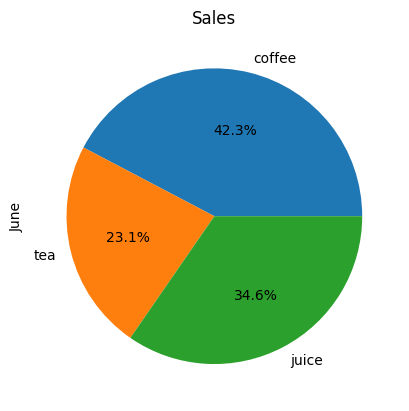

In [ ]:
s.plot(kind='pie', autopct='%1.1f%%',
       title='Sales',label='June')

In [ ]:
d=pd.DataFrame([[50,60,80],[45,70,85]],
               columns=['S','M','L'],
               index=['red','green'])

In [ ]:
d

,S,M,L
red,50,60,80
green,45,70,85


<Axes: xlabel='Color', ylabel='Price'>

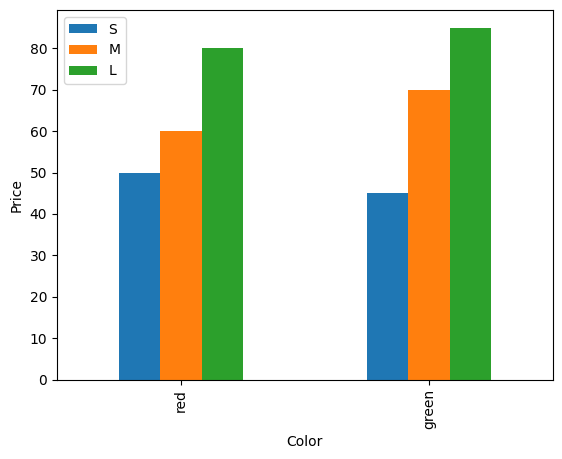

In [ ]:
d.plot(kind='bar',
       xlabel='Color',ylabel='Price')

## 12.5 存取 csv 檔與 pickle 檔

<font color=#DB9B1A>- 存取csv 檔與 pickle 檔相關的函數 - </font>

* to_csv()：將 d 以 csv 的檔案格式存儲到檔案中
* read_csv()：讀取 csv 檔案
* to_pickle()：以二進位檔的格式寫入檔案中
* read_pickle()：讀取二進位檔


In [ ]:
d=pd.DataFrame([[50,60,80],
                [45,70,85]],
               columns=['S','M','L'],
               index=['red','greed'])

In [ ]:
d

,S,M,L
red,50,60,80
greed,45,70,85


In [ ]:
d.to_csv('price.csv')

In [ ]:
!more price.csv   # display content

,S,M,L
red,50,60,80
greed,45,70,85


In [ ]:
pd.read_csv('price.csv')  # 第0列逗號之前沒有任何索引，因此輸出時會多了一個Unnamed: 0的欄索引

,Unnamed: 0,S,M,L
0,red,50,60,80
1,greed,45,70,85


In [ ]:
pd.read_csv('price.csv',index_col=0)  # 告訴 read_csv() 第 0 欄為列索引的值

,S,M,L
red,50,60,80
greed,45,70,85


In [ ]:
pd.read_csv('price.csv',index_col=0,nrows=1)  # 只讀一列

,S,M,L
red,50,60,80


In [ ]:
d.to_csv('price2.csv',header=None)   # 不寫入 header,因此不會有欄索引

In [ ]:
!more price2.csv

red,50,60,80
greed,45,70,85


In [ ]:
pd.read_csv('price2.csv',header=None,usecols=[1,2,3])  # 沒有欄索引，只讀1,2,3行（不會讀到列索引）

,1,2,3
0,50,60,80
1,45,70,85


In [ ]:
d.to_csv('price3.csv',index=None)  # 不寫入列索引

In [ ]:
! more price3.csv  #Pickle (serialize) object to file.

S,M,L
50,60,80
45,70,85


In [ ]:
pd.read_csv('price3.csv')

,S,M,L
0,50,60,80
1,45,70,85


In [ ]:
d.to_pickle('price4')

In [ ]:
d2=pd.read_pickle('price4')

In [ ]:
d2

,S,M,L
red,50,60,80
greed,45,70,85


In [ ]:
d2.eq(d)

,S,M,L
red,True,True,True
greed,True,True,True


In [ ]:
d2.eq(d).all(axis=None)  # axis=None 代表所有的元素

True

In [1]:
!rm *.csv

rm: cannot remove '*.csv': No such file or directory


In [2]:
!ls

sample_data


In [3]:
from google.colab import files
uploaded = files.upload()
import math
import pandas as pd

df = pd.read_csv("MData.csv")

print("1.匯入資料集：")
print(df.head())

Saving MData.csv to MData.csv
1.匯入資料集：
   Gender  B-Days    GA     BBW  AS-1  AS-5  PROM  Maternal Fever  \
0     1.0   102.0  37.0  2950.0   9.0  10.0   0.0             0.0   
1     0.0    90.0  29.0  1150.0   7.0   9.0   0.0             0.0   
2     1.0    98.0  33.0  2835.0   4.0   8.0   1.0             0.0   
3     1.0    98.0  33.0  2835.0   4.0   8.0   1.0             0.0   
4     1.0    99.0  33.0  2835.0   4.0   8.0   1.0             0.0   

   Chorioamnionitis  Antibiotic  ...  Cefotaxime  Fluconazole  Oxacillin  \
0               0.0         0.0  ...         NaN          NaN        NaN   
1               0.0         1.0  ...         NaN          NaN        NaN   
2               0.0         0.0  ...         1.0          NaN        NaN   
3               0.0         0.0  ...         1.0          NaN        NaN   
4               0.0         0.0  ...         1.0          NaN        NaN   

   Cefazolin  Amoxycilin  Clavulani  Vancomycin  Sulbactam  Die  Septicemia  
0        Na